In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from numpy import trapz
import pingouin as pg
from scipy.stats import wilcoxon

In [92]:
input_path = r'/Volumes/Behaviour/Tailored 90sec 2P Trials/'
output_path = r'/Volumes/Behaviour/Tailored 90sec 2P Trials/Area Under the Curve'
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']
last_session = ['2P07_Ses07', '2P08_Ses06', '2P09_Ses05', '2P10_Ses05', '2P11_Ses06']
cfa_mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
len(sessions)

47

In [93]:
# COMPUTE ARE UNDER THE CURVE FULL TRIAL, PRE & POST STIMULUS
session_names = []
auc_means = []
auc_delta = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    clusters = pd.DataFrame()
    clusters['cell'] = cell_ids[:-1]
    
    full_auc = pd.DataFrame(columns = cell_ids[:-1])
    pre_auc = pd.DataFrame(columns = cell_ids[:-1])
    post_auc = pd.DataFrame(columns = cell_ids[:-1])
    trials = cells['identifier'].unique()
        
    for t, trial in enumerate(trials):
        data = cells[cells['identifier']==trial]
        preS = data[:153]
        postS = data[183:]
        
        full = []
        pre = []
        post = []
        for cid in cell_ids[:-1]:
            full_trace = np.array(data[cid])
            full_trace_auc = trapz(full_trace)
            full.append(full_trace_auc)
            pre_trace = np.array(preS[cid])
            pre_trace_auc= trapz(pre_trace)
            pre.append(pre_trace_auc)
            post_trace = np.array(postS[cid])
            post_trace_auc= trapz(post_trace)
            post.append(post_trace_auc)
        
        full_auc.loc[t] = full
        pre_auc.loc[t] = pre
        post_auc.loc[t] = post
    
    
    full_auc['trial_mean'] = full_auc.mean(axis=1)
    full_auc['identifier'] = trials
    full_auc.to_csv(os.path.join(output_path, 'auc_full_'+ses_name+'.csv'))
    
    pre_auc['trial_mean'] = pre_auc.mean(axis=1)
    pre_auc['identifier'] = trials
    pre_auc.to_csv(os.path.join(output_path, 'auc_pre_'+ses_name+'.csv'))
    
    post_auc['trial_mean'] = post_auc.mean(axis=1)
    post_auc['identifier'] = trials
    post_auc.to_csv(os.path.join(output_path, 'auc_post_'+ses_name+'.csv'))
    
    for s in stimuli:
        full_mean = full_auc[full_auc['identifier'].str.contains(s)]['trial_mean'].mean()
        auc_means.append([ses_name, s, 'full', full_mean])
        pre_mean = pre_auc[pre_auc['identifier'].str.contains(s)]['trial_mean'].mean()
        auc_means.append([ses_name, s, 'pre', pre_mean])
        post_mean = post_auc[post_auc['identifier'].str.contains(s)]['trial_mean'].mean()
        auc_means.append([ses_name, s, 'post', post_mean])
        auc_diff = post_mean - pre_mean
        auc_delta.append([ses_name, s, auc_diff])
        
    ses_full_mean = full_auc['trial_mean'].mean(axis=0)
    auc_means.append([ses_name, 'session mean', 'full', ses_full_mean])
    ses_pre_mean = pre_auc['trial_mean'].mean(axis=0)
    auc_means.append([ses_name, 'session mean', 'pre', ses_pre_mean])
    ses_post_mean = post_auc['trial_mean'].mean(axis=0)
    auc_means.append([ses_name, 'session mean', 'post', ses_post_mean])
        
cols = ['session', 'modality', 'epoch', 'mean auc']
auc_metrics = pd.DataFrame(auc_means, columns=cols)
auc_metrics['mouse'] = auc_metrics['session'].apply(lambda x: x[:4])
auc_metrics['cfa'] = auc_metrics['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health')


auc_metrics.to_csv(os.path.join(output_path, 'auc_metrics_90s.csv'))

cols = ['session', 'modality', 'auc pre/post diff']
auc_delta = pd.DataFrame(auc_delta, columns=cols)
auc_delta['mouse'] = auc_delta['session'].apply(lambda x: x[:4])
auc_delta['cfa'] = auc_delta['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health')
auc_delta.to_csv(os.path.join(output_path, 'auc_delta_pre_post_90s.csv'))


processing:  dF_F0_LONG_2P06_Ses01.csv
processing:  dF_F0_LONG_2P06_Ses02.csv
processing:  dF_F0_LONG_2P06_Ses03.csv
processing:  dF_F0_LONG_2P05_Ses04.csv
processing:  dF_F0_LONG_2P06_Ses04.csv
processing:  dF_F0_LONG_2P06_Ses05.csv
processing:  dF_F0_LONG_2P05_Ses06.csv
processing:  dF_F0_LONG_2P06_Ses06.csv
processing:  dF_F0_LONG_2P05_Ses07.csv
processing:  dF_F0_LONG_2P06_Ses07.csv
processing:  dF_F0_LONG_2P07_Ses01.csv
processing:  dF_F0_LONG_2P08_Ses01.csv
processing:  dF_F0_LONG_2P07_Ses03.csv
processing:  dF_F0_LONG_2P08_Ses02.csv
processing:  dF_F0_LONG_2P07_Ses04.csv
processing:  dF_F0_LONG_2P07_Ses05.csv
processing:  dF_F0_LONG_2P08_Ses04.csv
processing:  dF_F0_LONG_2P07_Ses06.csv
processing:  dF_F0_LONG_2P08_Ses05.csv
processing:  dF_F0_LONG_2P07_Ses07.csv
processing:  dF_F0_LONG_2P08_Ses06.csv
processing:  dF_F0_LONG_2P07_CFA.csv
processing:  dF_F0_LONG_2P09_Ses01.csv
processing:  dF_F0_LONG_2P08_CFA.csv
processing:  dF_F0_LONG_2P11_Ses01.csv
processing:  dF_F0_LONG_2P10_

In [94]:
# COMPUTE ARE UNDER THE CURVE FOR 'NO STIMULATION' WHOLE TRIAL
session_names = []
no_stim_means = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    clusters = pd.DataFrame()
    clusters['cell'] = cell_ids[:-1]
    
    no_stim_auc = pd.DataFrame(columns = cell_ids[:-1])
    no_stim_trials = list(cells[cells['identifier'].str.contains('no stim')]['identifier'].unique())
        
    for t, trial in enumerate(no_stim_trials):
        data = cells[cells['identifier']==trial]
            
        auc = []
        for cid in cell_ids[:-1]:
            trace = np.array(data[cid])
            trace_auc= trapz(trace)
            auc.append(trace_auc)
           
        no_stim_auc.loc[t] = auc
       
    no_stim_auc['trial_mean'] = no_stim_auc.mean(axis=1)
    no_stim_auc['identifier'] = no_stim_trials
    no_stim_auc.to_csv(os.path.join(output_path, 'no_stim_auc'+ses_name+'.csv'))

    no_stim_mean = no_stim_auc['trial_mean'].mean(axis=0)
    no_stim_means.append([ses_name, no_stim_mean])
        
cols = ['session', 'no stim auc']
auc_noStim = pd.DataFrame(no_stim_means, columns=cols)
auc_noStim.to_csv(os.path.join(output_path, 'auc no stim.csv'))

auc_noStim.head()

processing:  dF_F0_LONG_2P06_Ses01.csv
processing:  dF_F0_LONG_2P06_Ses02.csv
processing:  dF_F0_LONG_2P06_Ses03.csv
processing:  dF_F0_LONG_2P05_Ses04.csv
processing:  dF_F0_LONG_2P06_Ses04.csv
processing:  dF_F0_LONG_2P06_Ses05.csv
processing:  dF_F0_LONG_2P05_Ses06.csv
processing:  dF_F0_LONG_2P06_Ses06.csv
processing:  dF_F0_LONG_2P05_Ses07.csv
processing:  dF_F0_LONG_2P06_Ses07.csv
processing:  dF_F0_LONG_2P07_Ses01.csv
processing:  dF_F0_LONG_2P08_Ses01.csv
processing:  dF_F0_LONG_2P07_Ses03.csv
processing:  dF_F0_LONG_2P08_Ses02.csv
processing:  dF_F0_LONG_2P07_Ses04.csv
processing:  dF_F0_LONG_2P07_Ses05.csv
processing:  dF_F0_LONG_2P08_Ses04.csv
processing:  dF_F0_LONG_2P07_Ses06.csv
processing:  dF_F0_LONG_2P08_Ses05.csv
processing:  dF_F0_LONG_2P07_Ses07.csv
processing:  dF_F0_LONG_2P08_Ses06.csv
processing:  dF_F0_LONG_2P07_CFA.csv
processing:  dF_F0_LONG_2P09_Ses01.csv
processing:  dF_F0_LONG_2P08_CFA.csv
processing:  dF_F0_LONG_2P11_Ses01.csv
processing:  dF_F0_LONG_2P10_

,session,no stim auc
0,2P06_Ses01,6.269634
1,2P06_Ses02,7.573967
2,2P06_Ses03,9.329582
3,2P05_Ses04,5.275179
4,2P06_Ses04,8.148984


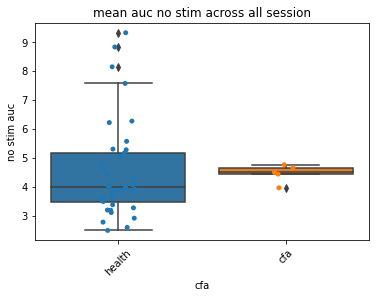

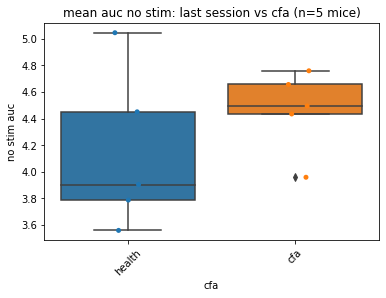

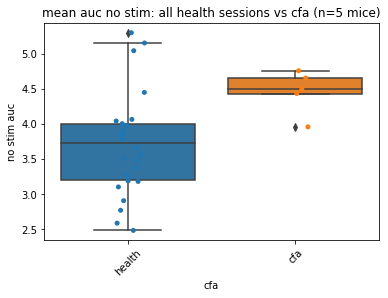

In [42]:
# COMPARE NO STIM AUC BETWEEN HEALTH AND CFA
#auc_noStim = pd.read_csv(os.path.join(output_path, 'auc no stim.csv'))
auc_noStim['mouse'] = auc_noStim['session'].apply(lambda x: x[:4])
auc_noStim['cfa'] =auc_noStim['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health')

# ALL MICE, ALL SESSIONS
ax = sns.stripplot(x='cfa', y="no stim auc", data=auc_noStim)
ax = sns.boxplot(x='cfa', y="no stim auc", data=auc_noStim)
plt.xticks(rotation=45)
#ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.05, 0.3)
plt.title('mean auc no stim across all session')
plt.savefig(os.path.join(output_path, 'mean auc no stim all sessions health vs cfa.png'), bbox_inches='tight')
plt.show()

# LAST SESSION VS CFA
last_session = ['2P07_Ses07', '2P08_Ses06', '2P09_Ses05', '2P10_Ses05', '2P11_Ses06']
df = auc_noStim.loc[auc_noStim['session'].str.contains('CFA')|auc_noStim['session'].isin(last_session)]

ax = sns.stripplot(x='cfa', y="no stim auc", data=df)
ax = sns.boxplot(x='cfa', y="no stim auc", data=df)
plt.xticks(rotation=45)
#ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.05, 0.3)
plt.title('mean auc no stim: last session vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc no stim last session vs cfa.png'), bbox_inches='tight')
plt.show()

# CFA MICE ONLY
df_5 = auc_noStim.loc[auc_noStim['mouse'].isin(cfa_mice)]

ax = sns.stripplot(x='cfa', y="no stim auc", data=df_5)
ax = sns.boxplot(x='cfa', y="no stim auc", data=df_5)
plt.xticks(rotation=45)
#ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.05, 0.3)
plt.title('mean auc no stim: all health sessions vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc no stim all session vs cfa_nis5.png'), bbox_inches='tight')
plt.show()

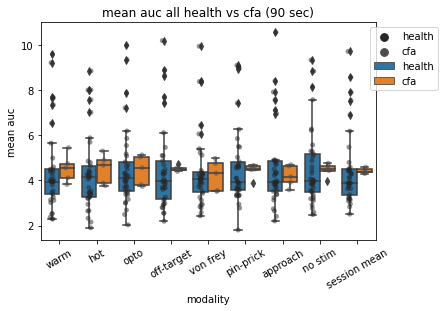

        Source  ddof1         H     p-unc
Kruskal    cfa      1  7.559585  0.005969


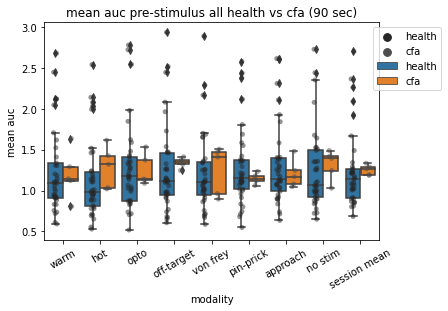

        Source  ddof1        H   p-unc
Kruskal    cfa      1  5.98841  0.0144


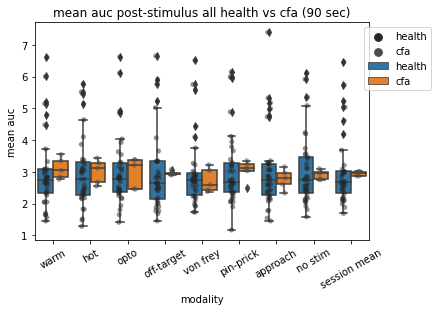

        Source  ddof1         H     p-unc
Kruskal    cfa      1  5.797866  0.016046


,session,modality,epoch,mean auc,mouse,cfa
2,2P06_Ses01,warm,post,4.476611,2P06,health
5,2P06_Ses01,hot,post,3.863953,2P06,health
8,2P06_Ses01,opto,post,3.923100,2P06,health
11,2P06_Ses01,off-target,post,4.069257,2P06,health
14,2P06_Ses01,von frey,post,4.096251,2P06,health


In [95]:
# PLOT MEAN AUC FOR ALL SESSIONS HEALTH & CFA 
auc_metrics_full = auc_metrics.loc[auc_metrics['epoch']=='full']
auc_metrics_pre = auc_metrics.loc[auc_metrics['epoch']=='pre']
auc_metrics_post = auc_metrics.loc[auc_metrics['epoch']=='post']

ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_full, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_full)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc all health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'mean auc all health vs cfa 90sec.png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=auc_metrics_full, dv="mean auc", between="cfa"))

ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc pre-stimulus all health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'mean auc pre-stimulus all health vs cfa (90sec).png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=auc_metrics_pre, dv="mean auc", between="cfa"))

ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc post-stimulus all health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'mean auc post-stimulus all health vs cfa (90 sec).png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=auc_metrics_post, dv="mean auc", between="cfa"))
auc_metrics_post.head()

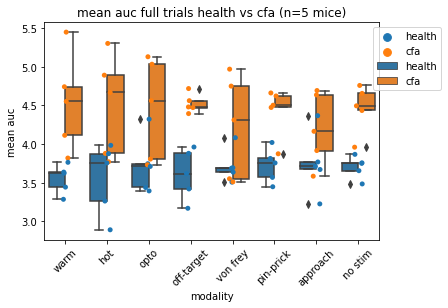

         Source    W  ddof1    Q     p-unc
Friedman    cfa  1.0      1  5.0  0.025347
            Source         W  ddof1    Q     p-unc
Friedman  modality  0.085714      7  3.0  0.885002


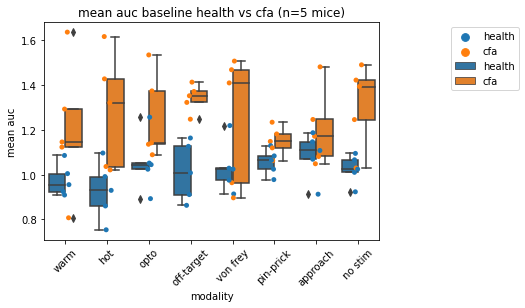

         Source    W  ddof1    Q     p-unc
Friedman    cfa  1.0      1  5.0  0.025347
            Source         W  ddof1    Q     p-unc
Friedman  modality  0.091429      7  3.2  0.865905


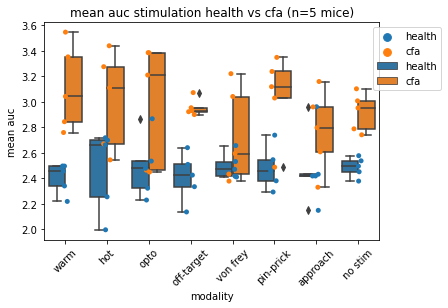

         Source    W  ddof1    Q     p-unc
Friedman    cfa  1.0      1  5.0  0.025347
            Source        W  ddof1         Q     p-unc
Friedman  modality  0.12381      7  4.333333  0.740683


In [96]:
# PLOT MEAN AUC FULL TRIAL CFA MICE ONLY 
auc_metrics_full = auc_metrics.loc[auc_metrics['epoch']=='full']
auc_metrics_pre = auc_metrics.loc[auc_metrics['epoch']=='pre']
auc_metrics_post = auc_metrics.loc[auc_metrics['epoch']=='post']

stats_list = []
cols = ['mouse', 'modality', 'cfa', 'mean auc']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = auc_metrics_full[auc_metrics_full['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean auc'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean auc'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse auc full trial 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean auc', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean auc', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.02, 0.1)
plt.title('mean auc full trials health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc full trials health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean auc", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean auc", within="modality", subject="mouse"))


# MEAN AUC BASELINE CFA MICE ONLY 
stats_list = []
cols = ['mouse', 'modality', 'cfa', 'mean auc']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = auc_metrics_pre[auc_metrics_pre['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean auc'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean auc'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse auc baseline 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean auc', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean auc', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.02, 0.1)
plt.title('mean auc baseline health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc baseline health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean auc", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean auc", within="modality", subject="mouse"))


# MEAN AUC STIMULATION CFA MICE ONLY 
stats_list = []
cols = ['mouse', 'modality', 'cfa', 'mean auc']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = auc_metrics_post[auc_metrics_post['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean auc'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean auc'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse auc stimulation 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean auc', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean auc', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.02, 0.1)
plt.title('mean auc stimulation health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc stimulation health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean auc", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean auc", within="modality", subject="mouse"))


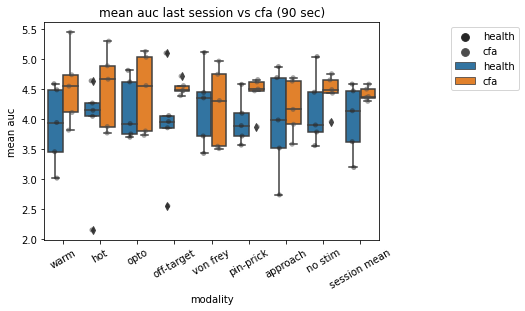

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
no stim full trial auc:  3.0 0.3125


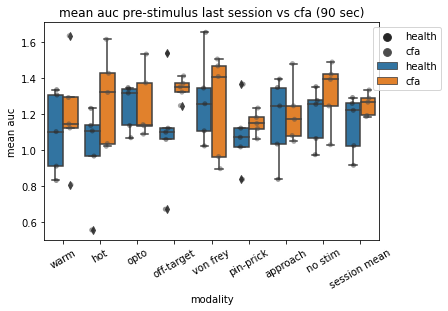

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.36      1  1.8  0.179712


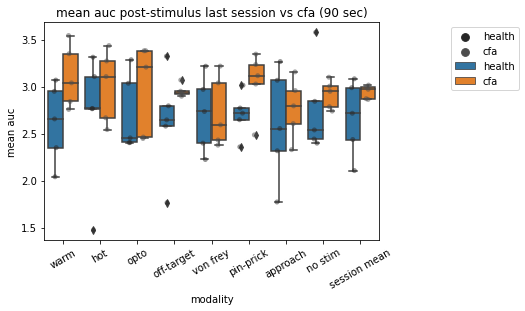

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721


In [97]:
# PLOT MEAN AUC FULL TRIAL LAST SESSION HEALTH & CFA 
auc_metrics_full = auc_metrics_full.loc[auc_metrics_full['session'].str.contains('CFA')|auc_metrics_full['session'].isin(last_session)]
auc_metrics_pre = auc_metrics_pre.loc[auc_metrics_pre['session'].str.contains('CFA')|auc_metrics_pre['session'].isin(last_session)]
auc_metrics_post = auc_metrics_post[auc_metrics_post['session'].str.contains('CFA')|auc_metrics_post['session'].isin(last_session)]

ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_full, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_full)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'mean auc last session vs cfa 90sec.png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=auc_metrics_full, dv="mean auc", within="cfa", subject="mouse"))

noStim_health = auc_metrics_full.loc[(auc_metrics_full['modality']=='no stim') & (auc_metrics_full['cfa']=='health')]
noStim_cfa = auc_metrics_full.loc[(auc_metrics_full['modality']=='no stim') & (auc_metrics_full['cfa']=='cfa')]
d = np.array(noStim_health['mean auc']) - np.array(noStim_cfa['mean auc'])
res = wilcoxon(d)
print('no stim full trial auc: ', res.statistic, res.pvalue)


# PLOT MEAN AUC BASELINE LAST SESSION HEALTH & CFA
ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc pre-stimulus last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'mean auc pre-stimulus last session vs cfa (90sec).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=auc_metrics_pre, dv="mean auc", within="cfa", subject="mouse"))

# PLOT MEAN AUC BASELINE LAST SESSION HEALTH & CFA
ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc post-stimulus last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'mean auc post-stimulus last session vs cfa (90 sec).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=auc_metrics_post, dv="mean auc", within="cfa", subject="mouse"))



In [86]:
noStim_health

,session,modality,epoch,mean auc,mouse,cfa
534,2P07_Ses07,no stim,full,3.904417,2P07,health
561,2P08_Ses06,no stim,full,3.787663,2P08,health
1020,2P09_Ses05,no stim,full,3.560093,2P09,health
1047,2P10_Ses05,no stim,full,4.450263,2P10,health
1074,2P11_Ses06,no stim,full,5.044144,2P11,health
